In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [128]:
def export_figure (title):
    plt.tight_layout()
    plt.savefig(os.path.join("figs", title + ".eps"))
    plt.show()

In [129]:
institution_dict = {"CAU_Germany": "Kiel University",
                "Durham_England": "Durham University",
                "Edinburgh_Scotland": "University of Edinburgh",
                "Glasgow_Scotland": "University of Glasgow",
                "Kennesaw_USA": "Kennesaw State University",
                "UOC_Spain": "Universitat Oberta de Catalunya",
                "UofT_Canada": "University of Toronto",
                "Uppsala_Sweden": "Uppsala University",
                "VirginiaTech_USA": "Virginia Tech"
                   }

In [130]:
all_electives =  pd.read_csv(os.path.join("curriculum_content", "all_electives.csv"))
institution_elective_count = all_electives.groupby('institution')['elective'].count()
institution_elective_count['CAU_Germany']

13

## tab:electives_enrollment_by_institution

In [131]:
elective_enrolment = pd.read_csv(os.path.join("enrolment", "all_elective_enrolment_rounded.csv"))
tab_electives_enrollment_by_institution = elective_enrolment[['institution','AcademicYearStart','MCode','Women3','Men3','Students3']].groupby(['institution','AcademicYearStart']).agg({'MCode': 'count', 'Women3': 'sum', 'Men3': 'sum', 'Students3': 'sum'}).reset_index()
tab_electives_enrollment_by_institution.columns = ['Institution', 'Academic Year', 'Number of electives available', 'Women elective enrolments', 'Men elective enrolments', 'All elective enrolments']
tab_electives_enrollment_by_institution.replace(institution_dict, inplace = True)
colpar = 'p{1.6cm}'

with open('figs/tab_electives_enrollment_by_institution.tex', 'w') as tf:
     tf.write(tab_electives_enrollment_by_institution.to_latex(index=False, column_format='ll' + colpar*4))

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_12657/2146979430.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(tab_electives_enrollment_by_institution.to_latex(index=False, column_format='ll' + colpar*4))


## tab:oddratio_small

In [132]:
oddsratio_cols=['title','WY','MY','WA','MA', 'LOR']

stage_two_enrolment_collapsed = pd.read_csv("stage_two_enrolment_collapsed.csv")
stage_two_enrolment_collapsed.columns=['elective', 'title', 'WY', 'MY', 'WA', 'MA', 'AA']
stage_two_enrolment_collapsed['WN'] = stage_two_enrolment_collapsed['WA'] - stage_two_enrolment_collapsed['WY']
stage_two_enrolment_collapsed['MN'] = stage_two_enrolment_collapsed['MA'] - stage_two_enrolment_collapsed['MY']
stage_two_enrolment_collapsed['OR'] = stage_two_enrolment_collapsed['WY']*stage_two_enrolment_collapsed['MN'] / (stage_two_enrolment_collapsed['WN']*stage_two_enrolment_collapsed['MY'])
stage_two_enrolment_collapsed['LOR'] = np.log(stage_two_enrolment_collapsed['OR'])
print(stage_two_enrolment_collapsed[(stage_two_enrolment_collapsed['AA']>12) & (stage_two_enrolment_collapsed['LOR']< -0.9155)].sort_values('OR')[oddsratio_cols].head(12).to_latex(index=False))
stage_two_enrolment_collapsed.sort_values('OR', ascending=False)

\begin{tabular}{lrrrrr}
\toprule
                                     title &   WY &    MY &     WA &     MA &       LOR \\
\midrule
                             Deep Learning &  0.0 &  33.0 &  846.0 & 2796.0 &      -inf \\
                   Automatic Graph Drawing &  0.0 &  15.0 &   39.0 &  168.0 &      -inf \\
      Algorithmic Intelligence in Robotics &  0.0 &  21.0 &  150.0 &  813.0 &      -inf \\
               Natural Language Processing &  0.0 &  24.0 &  846.0 & 2796.0 &      -inf \\
COMP4187: PARALLEL SCIENTIFIC COMPUTING II &  0.0 &  33.0 &   18.0 &  126.0 &      -inf \\
                HPC \& Parallel Programming &  0.0 &  30.0 & 1257.0 & 4365.0 &      -inf \\
         Neural networks and deep learning &  6.0 & 111.0 &   39.0 &  168.0 & -2.371227 \\
                     Theory of Computation &  3.0 &  69.0 &  708.0 & 3378.0 & -1.589291 \\
                            Machine Vision &  6.0 &  72.0 & 1257.0 & 4365.0 & -1.251864 \\
            Low-Level Parallel Programming & 12

/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_12657/746573504.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stage_two_enrolment_collapsed[(stage_two_enrolment_collapsed['AA']>12) & (stage_two_enrolment_collapsed['LOR']< -0.9155)].sort_values('OR')[oddsratio_cols].head(12).to_latex(index=False))


,elective,title,WY,MY,WA,MA,AA,WN,MN,OR,LOR
46,COMP3421,COMP3421: COMPUTER SCIENCE INTO SCHOOLS,6.0,0.0,54.0,123.0,6.0,48.0,123.0,inf,inf
73,COMP4167,COMP4167: NATURAL LANGUAGE PROCESSING,18.0,108.0,18.0,126.0,126.0,0.0,18.0,inf,inf
187,IT4793,Applied Data Driven Solutions,3.0,0.0,438.0,1485.0,3.0,435.0,1485.0,inf,inf
181,IT4533,Health information Security and Privacy,6.0,3.0,411.0,1569.0,9.0,405.0,1566.0,7.733333,2.045540
185,IT4733,Big Data System Administration,12.0,6.0,819.0,2880.0,18.0,807.0,2874.0,7.122677,1.963284
...,...,...,...,...,...,...,...,...,...,...,...
158,CYBR3220,Global IS Project Management,0.0,6.0,846.0,2796.0,6.0,846.0,2790.0,0.000000,-inf
164,CYBR4700,NaN,0.0,3.0,411.0,1569.0,3.0,411.0,1566.0,0.000000,-inf
196,Inf-GraphDraw,Automatic Graph Drawing,0.0,15.0,39.0,168.0,15.0,39.0,153.0,0.000000,-inf
203,SWE4803,Independent Study,0.0,3.0,438.0,1485.0,3.0,438.0,1482.0,0.000000,-inf


## tab:oddratio_big

In [133]:
print(stage_two_enrolment_collapsed[(stage_two_enrolment_collapsed['AA']>12) & (stage_two_enrolment_collapsed['LOR']>0.9155)].sort_values('OR',ascending=False)[oddsratio_cols].head(12).to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
                                             title &   WY &    MY &     WA &     MA &      LOR \\
\midrule
             COMP4167: NATURAL LANGUAGE PROCESSING & 18.0 & 108.0 &   18.0 &  126.0 &      inf \\
                    Big Data System Administration & 12.0 &   6.0 &  819.0 & 2880.0 & 1.963284 \\
      Machine Learning for Enterprise Applications &  9.0 &   6.0 &  846.0 & 2796.0 & 1.609438 \\
   COMP3621: Public Engagement in Computer Science &  6.0 &   9.0 &   42.0 &  237.0 & 1.440362 \\
                       IT, Ethics and Organisation & 57.0 &  63.0 &  129.0 &  394.0 & 1.425369 \\
                       Advanced Interaction Design & 60.0 &  75.0 &  129.0 &  394.0 & 1.307941 \\
                COMP4107: ADVANCED COMPUTER VISION & 15.0 &  75.0 &   18.0 &  126.0 & 1.223775 \\
               Human-Computer Interaction Capstone & 54.0 &  81.0 &  708.0 & 3378.0 & 1.212196 \\
                         Creative Computing Studio & 51.0 &  81.0 &  708.0 &

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_12657/3730789573.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stage_two_enrolment_collapsed[(stage_two_enrolment_collapsed['AA']>12) & (stage_two_enrolment_collapsed['LOR']>0.9155)].sort_values('OR',ascending=False)[oddsratio_cols].head(12).to_latex(index=False))


In [134]:
elective_enrolment['Students3'].sum()

51072

In [135]:
code_set = pd.read_csv(os.path.join("curriculum_content", "ACM_2023_CAH_codes.csv"), dtype="string")
code_set = code_set.rename(columns={'Abbrev': 'code'})
acm_code_set = code_set[~(code_set.Area == "Non-CS application")]
acm_code_list = list(acm_code_set['code'])
cah_code_set = code_set[code_set.Area == "Non-CS application"]
cah_code_list = list(cah_code_set['code'])
print(acm_code_set.to_latex(index=False))
print(cah_code_set.to_latex(index=False))

\begin{tabular}{lll}
\toprule
                                   Title & code &         Area \\
\midrule
               Algorithms and Complexity &   AL &     Software \\
           Architecture and Organization &   AR &      Systems \\
                 Artificial Intelligence &   AI & Applications \\
                         Data Management &   DM &      Systems \\
    Foundations of Programming Languages &  FPL &     Software \\
     Graphics and Interactive Techniques &  GIT & Applications \\
              Human-Computer Interaction &  HCI & Applications \\
Mathematical and Statistical Foundations &  MSF & Underpinning \\
            Networking and Communication &   NC &      Systems \\
                       Operating Systems &   OS &      Systems \\
      Parallel and Distributed Computing &  PDC &      Systems \\
                                Security &  SEC &      Systems \\
     Society, Ethics and Professionalism &  SEP & Underpinning \\
       Software Development Fundament

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_12657/3152829440.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(acm_code_set.to_latex(index=False))
/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_12657/3152829440.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(cah_code_set.to_latex(index=False))


## count content tags

In [136]:
dataset_codes = pd.read_csv(os.path.join("curriculum_content","coded","stage2_codes_columns.csv"))
dataset_codes_binary = pd.read_csv(os.path.join("curriculum_content","coded","stage2_coded_binary.csv"))
codes_agg = dataset_codes_binary.drop(columns=['institution','elective']).sum()
codeset_count = code_set.copy().rename({'code': 'Code'}, axis=1).set_index('Code')
codeset_count['Elective count'] = codes_agg
codeset_count['Elective count'] = codeset_count['Elective count'].fillna(0).astype("int32")
codeset_count['Title'] = codeset_count['Title'].str.capitalize()
codeset_count.drop(columns=['Area'], inplace=True)
codeset_count = codeset_count[['Title', 'Elective count']]
#print(codeset_count.reset_index().to_latex(index=False))
topic_results = pd.read_csv('topic_results.csv').set_index('topic')
codeset_count_topics = codeset_count.merge(topic_results, left_index=True, right_index=True)
column_mapper = {"pop_topic_all_mean": "Overall popularity", "pop_topic_wm_diff_mean": "Popularity difference in women and men", "pop_women": "Popularity with women", "pop_men": "Popularity with men"}
codeset_count_topics.rename(column_mapper, inplace=True, axis=1)
codeset_count_topics =  codeset_count_topics[['Title'] + ['Elective count'] + list(column_mapper.values())]     
print(codeset_count_topics.style.format(decimal='.', thousands=',', precision=1).to_latex())

\begin{tabular}{llrrrrr}
 & Title & Elective count & Overall popularity & Popularity difference in women and men & Popularity with women & Popularity with men \\
AL & Algorithms and complexity & 42 & -302.6 & -39.6 & -322.4 & -282.8 \\
AR & Architecture and organization & 7 & -299.5 & -35.2 & -317.1 & -281.9 \\
AI & Artificial intelligence & 65 & -94.3 & -38.8 & -113.7 & -74.9 \\
DM & Data management & 20 & -97.1 & 53.2 & -70.5 & -123.8 \\
FPL & Foundations of programming languages & 23 & -555.3 & 242.7 & -434.0 & -676.6 \\
GIT & Graphics and interactive techniques & 19 & -119.7 & -67.0 & -153.2 & -86.2 \\
HCI & Human-computer interaction & 10 & -45.7 & 56.5 & -17.4 & -74.0 \\
MSF & Mathematical and statistical foundations & 22 & -139.5 & 98.5 & -90.3 & -188.8 \\
NC & Networking and communication & 16 & -116.1 & -19.9 & -126.1 & -106.2 \\
OS & Operating systems & 5 & -315.0 & 53.9 & -288.0 & -341.9 \\
PDC & Parallel and distributed computing & 11 & -544.1 & 34.8 & -526.7 & -561.4 \\
SE

In [50]:
hci_electives = list(dataset_codes_binary[dataset_codes_binary['HCI']>0]['elective'])
enrolment_hci_electives = stage_two_enrolment_collapsed[stage_two_enrolment_collapsed['elective'].isin(hci_electives)]
enrolment_hci_electives.sort_values('LOR')

,elective,title,WY,MY,WA,MA,AA,WN,MN,OR,LOR
136,CS4712,User Interface Engineering,27.0,153.0,1257.0,4365.0,180.0,1230.0,4212.0,0.604304,-0.503678
85,COMPSCI4023,Human-Computer Interaction (H) COMPSCI4023,66.0,219.0,408.0,1470.0,285.0,342.0,1251.0,1.102379,0.097471
202,SWE4783,User Interaction Engineering,48.0,147.0,1257.0,4365.0,195.0,1209.0,4218.0,1.139211,0.130336
62,COMP3647,COMP3647: Human-AI Interaction Design,30.0,78.0,66.0,207.0,108.0,36.0,129.0,1.378205,0.320782
223,cxinfr11017,Postgraduate Course: Human-Computer Interactio...,63.0,132.0,411.0,1272.0,195.0,348.0,1140.0,1.563480,0.446914
90,COMPSCI4068,Mobile Human-Computer Interaction (H) COMPSCI4068,150.0,381.0,408.0,1470.0,531.0,258.0,1089.0,1.661784,0.507891
107,CS3724,Introduction to Human-Computer Interaction,198.0,483.0,708.0,3378.0,681.0,510.0,2895.0,2.327000,0.844580
9,1MD300,Social Robotics and Human-Robot Interaction,21.0,27.0,129.0,394.0,48.0,108.0,367.0,2.643004,0.971916
140,CS4784,Human-Computer Interaction Capstone,54.0,81.0,708.0,3378.0,135.0,654.0,3297.0,3.360856,1.212196
7,1MD001,Advanced Interaction Design,60.0,75.0,129.0,394.0,135.0,69.0,319.0,3.698551,1.307941


In [25]:
# heatmap of topics against institution
institution_codes = dataset_codes_binary.groupby('institution').sum()
code_headings = list(institution_codes.columns)
institution_codes = institution_codes.join(institution_elective_count)

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_19946/2371714596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  institution_acm_codes[acm_code_list] = institution_codes[acm_code_list].div(institution_codes['elective'], axis=0)


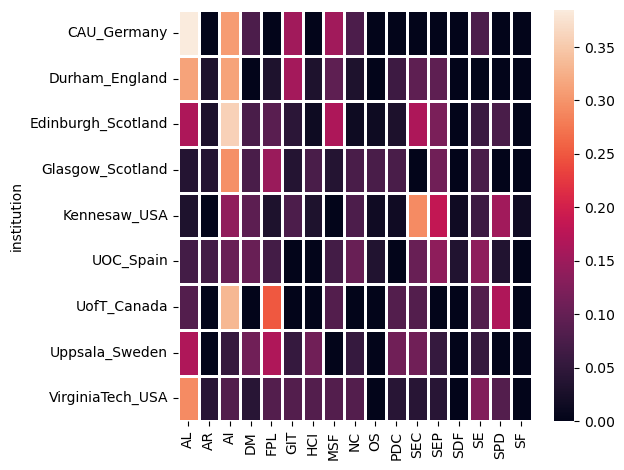

In [26]:
institution_acm_codes = institution_codes[acm_code_list + ['elective']]
institution_acm_codes[acm_code_list] = institution_codes[acm_code_list].div(institution_codes['elective'], axis=0)
sns.heatmap(institution_acm_codes[acm_code_list], linewidths=1)
export_figure('acm_institution_heatmap')

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_19946/992147040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  institution_cah_codes[selected_cah_codes] = institution_codes[selected_cah_codes].div(institution_codes['elective'], axis=0)


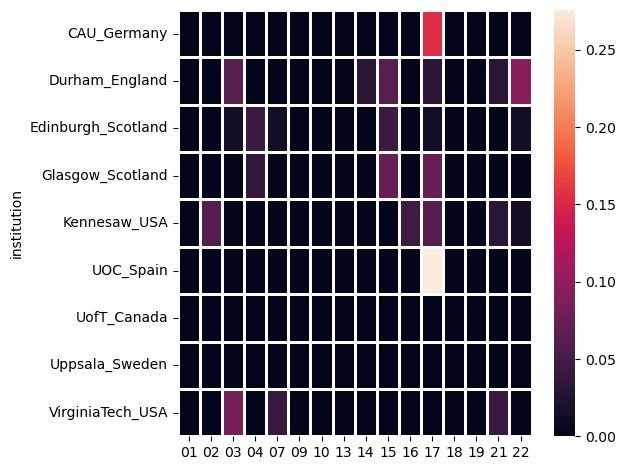

In [27]:
selected_cah_codes = [code for code in cah_code_list if code in institution_codes.columns]
institution_cah_codes = institution_codes[selected_cah_codes + ['elective']]
institution_cah_codes[selected_cah_codes] = institution_codes[selected_cah_codes].div(institution_codes['elective'], axis=0)
sns.heatmap(institution_cah_codes[selected_cah_codes], linewidths=1)
export_figure('cah_institution_heatmap')

In [9]:
# bubble chart of topics, size = #codings, distance ~ co-selection
# or heat map of co-selection
# table of number of institutions, number of students, number of module selections
# table of ACM and CAH codings
# bar chart with error bars for topic and non-topic posteriors
# structure of Bayesian model
# graph of elective odds ratios marked with significance
# table of module title and codings for most significant/largest effect sizes
# agreement by topic (pilot and final)